# Medical Insurance Prediction 

Author: Simon Chen

Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. 






# 0. Import Libraries 

In [3]:
# Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline

# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Models and Algorithms
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso,
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor

# Other Utilities
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt


## 1. Introduction to the Dataset

The `Medi.csv` dataset consists of various features that can be used to predict insurance premium prices. Below is a brief description of each feature:

- **Age**: The age of the insured individual.
- **Diabetes**: Indicates whether the individual has diabetes (1 for Yes, 0 for No).
- **BloodPressureProblems**: Indicates if the individual has blood pressure issues (1 for Yes, 0 for No).
- **AnyTransplants**: Indicates if the individual has undergone any transplants (1 for Yes, 0 for No).
- **AnyChronicDiseases**: Indicates if the individual has any chronic diseases (1 for Yes, 0 for No).
- **Height**: Height of the individual (in centimeters).
- **Weight**: Weight of the individual (in kilograms).
- **KnownAllergies**: Indicates if the individual has known allergies (1 for Yes, 0 for No).
- **HistoryOfCancerInFamily**: Indicates if there is a family history of cancer (1 for Yes, 0 for No).
- **NumberOfMajorSurgeries**: The number of major surgeries the individual has undergone.
- **PremiumPrice**: The target variable representing the insurance premium price.

We use these features to build a model that can predict the **PremiumPrice** for an individual based on their health and demographic information. By understanding and analyzing these features, we can gain insights into the factors that most significantly affect insurance costs, helping insurance companies set fair and accurate pricing.


## 2. Data Preprocessing

 ### The code below provides information about the dataset. Key points to note include:
 - #### The dataset contains 986 samples.
 - #### No missing data is present.
 - #### Each feature is of the int64 data type, with some being categorical and others numerical.

In [7]:
df = pd.read_csv('Medi.csv', thousands=',')
print(df.head())
print(df.info())
print(df.describe())

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1 

In [8]:
print(df.isnull().sum())
# we can see there is no missing data.

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


#### Feature Scaling

In [10]:
# I choose standardization as scaling method.
# I only scale numerical features.
numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())

        Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0  0.233197         0                      0               0   
1  1.307981         1                      0               0   
2 -0.411674         1                      1               0   
3  0.734763         1                      1               0   
4 -0.268369         0                      0               0   

   AnyChronicDiseases    Height    Weight  KnownAllergies  \
0                   0 -1.306105 -1.399250               0   
1                   0  1.170852 -0.277062               0   
2                   0 -1.008870 -1.258976               0   
3                   1  1.468086  1.125674               0   
4                   1 -0.216244  0.774990               0   

   HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice  
0                        0               -0.891187         25000  
1                        0               -0.891187         29000  
2                        0                0.444

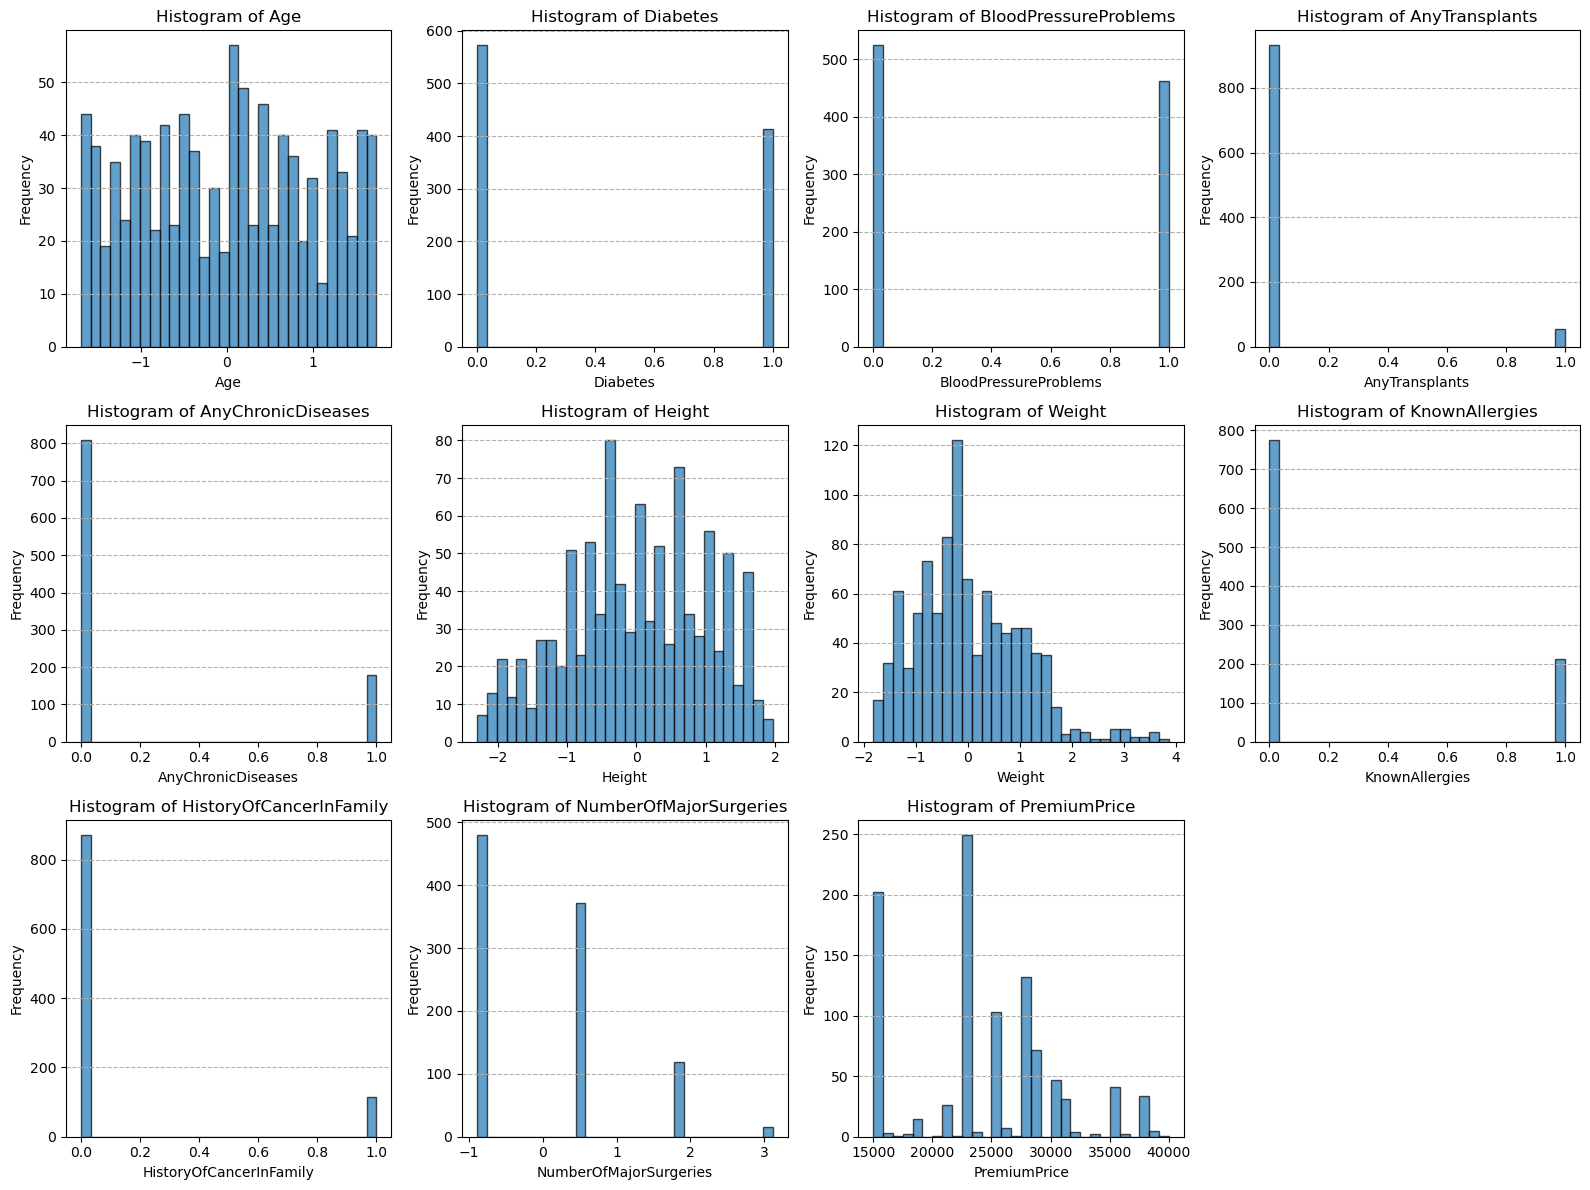

In [11]:
# data visualization, with help from ChatGPT.
num_columns = len(df.columns)
num_rows = (num_columns + 3) // 4
fig = plt.figure(figsize=(16, 4 * num_rows))
gs = gridspec.GridSpec(num_rows, 4, figure=fig)

for i, column in enumerate(df.columns):
    ax = fig.add_subplot(gs[i])
    ax.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

## 3. Exploratory Data Analysis

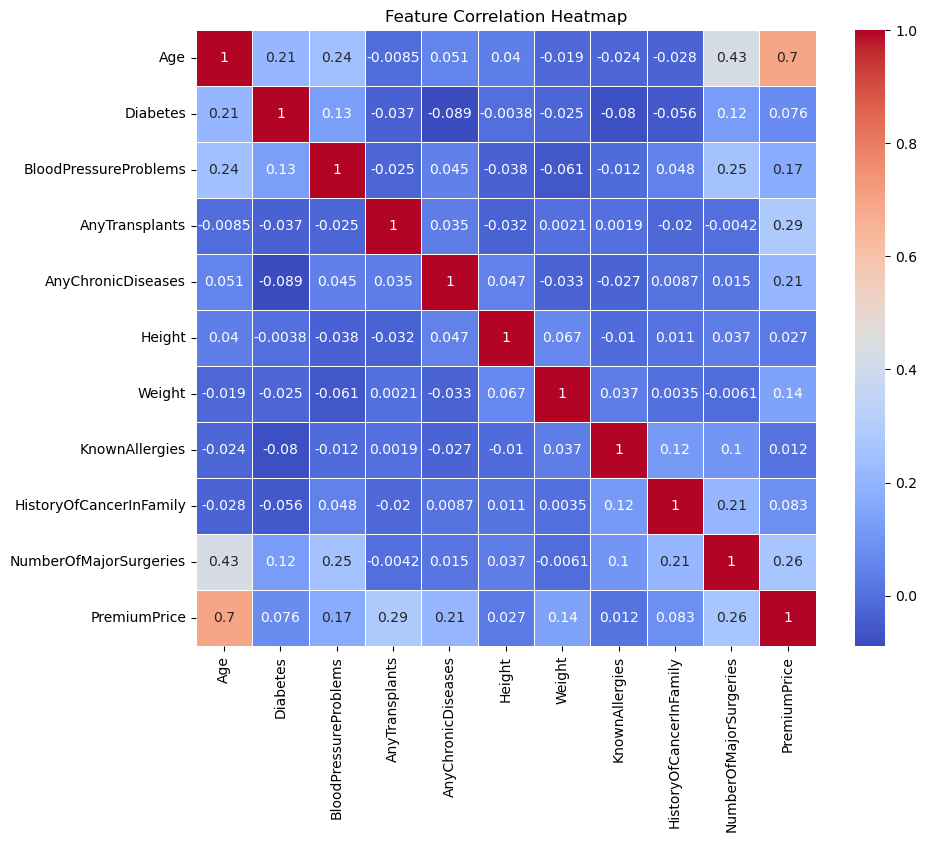

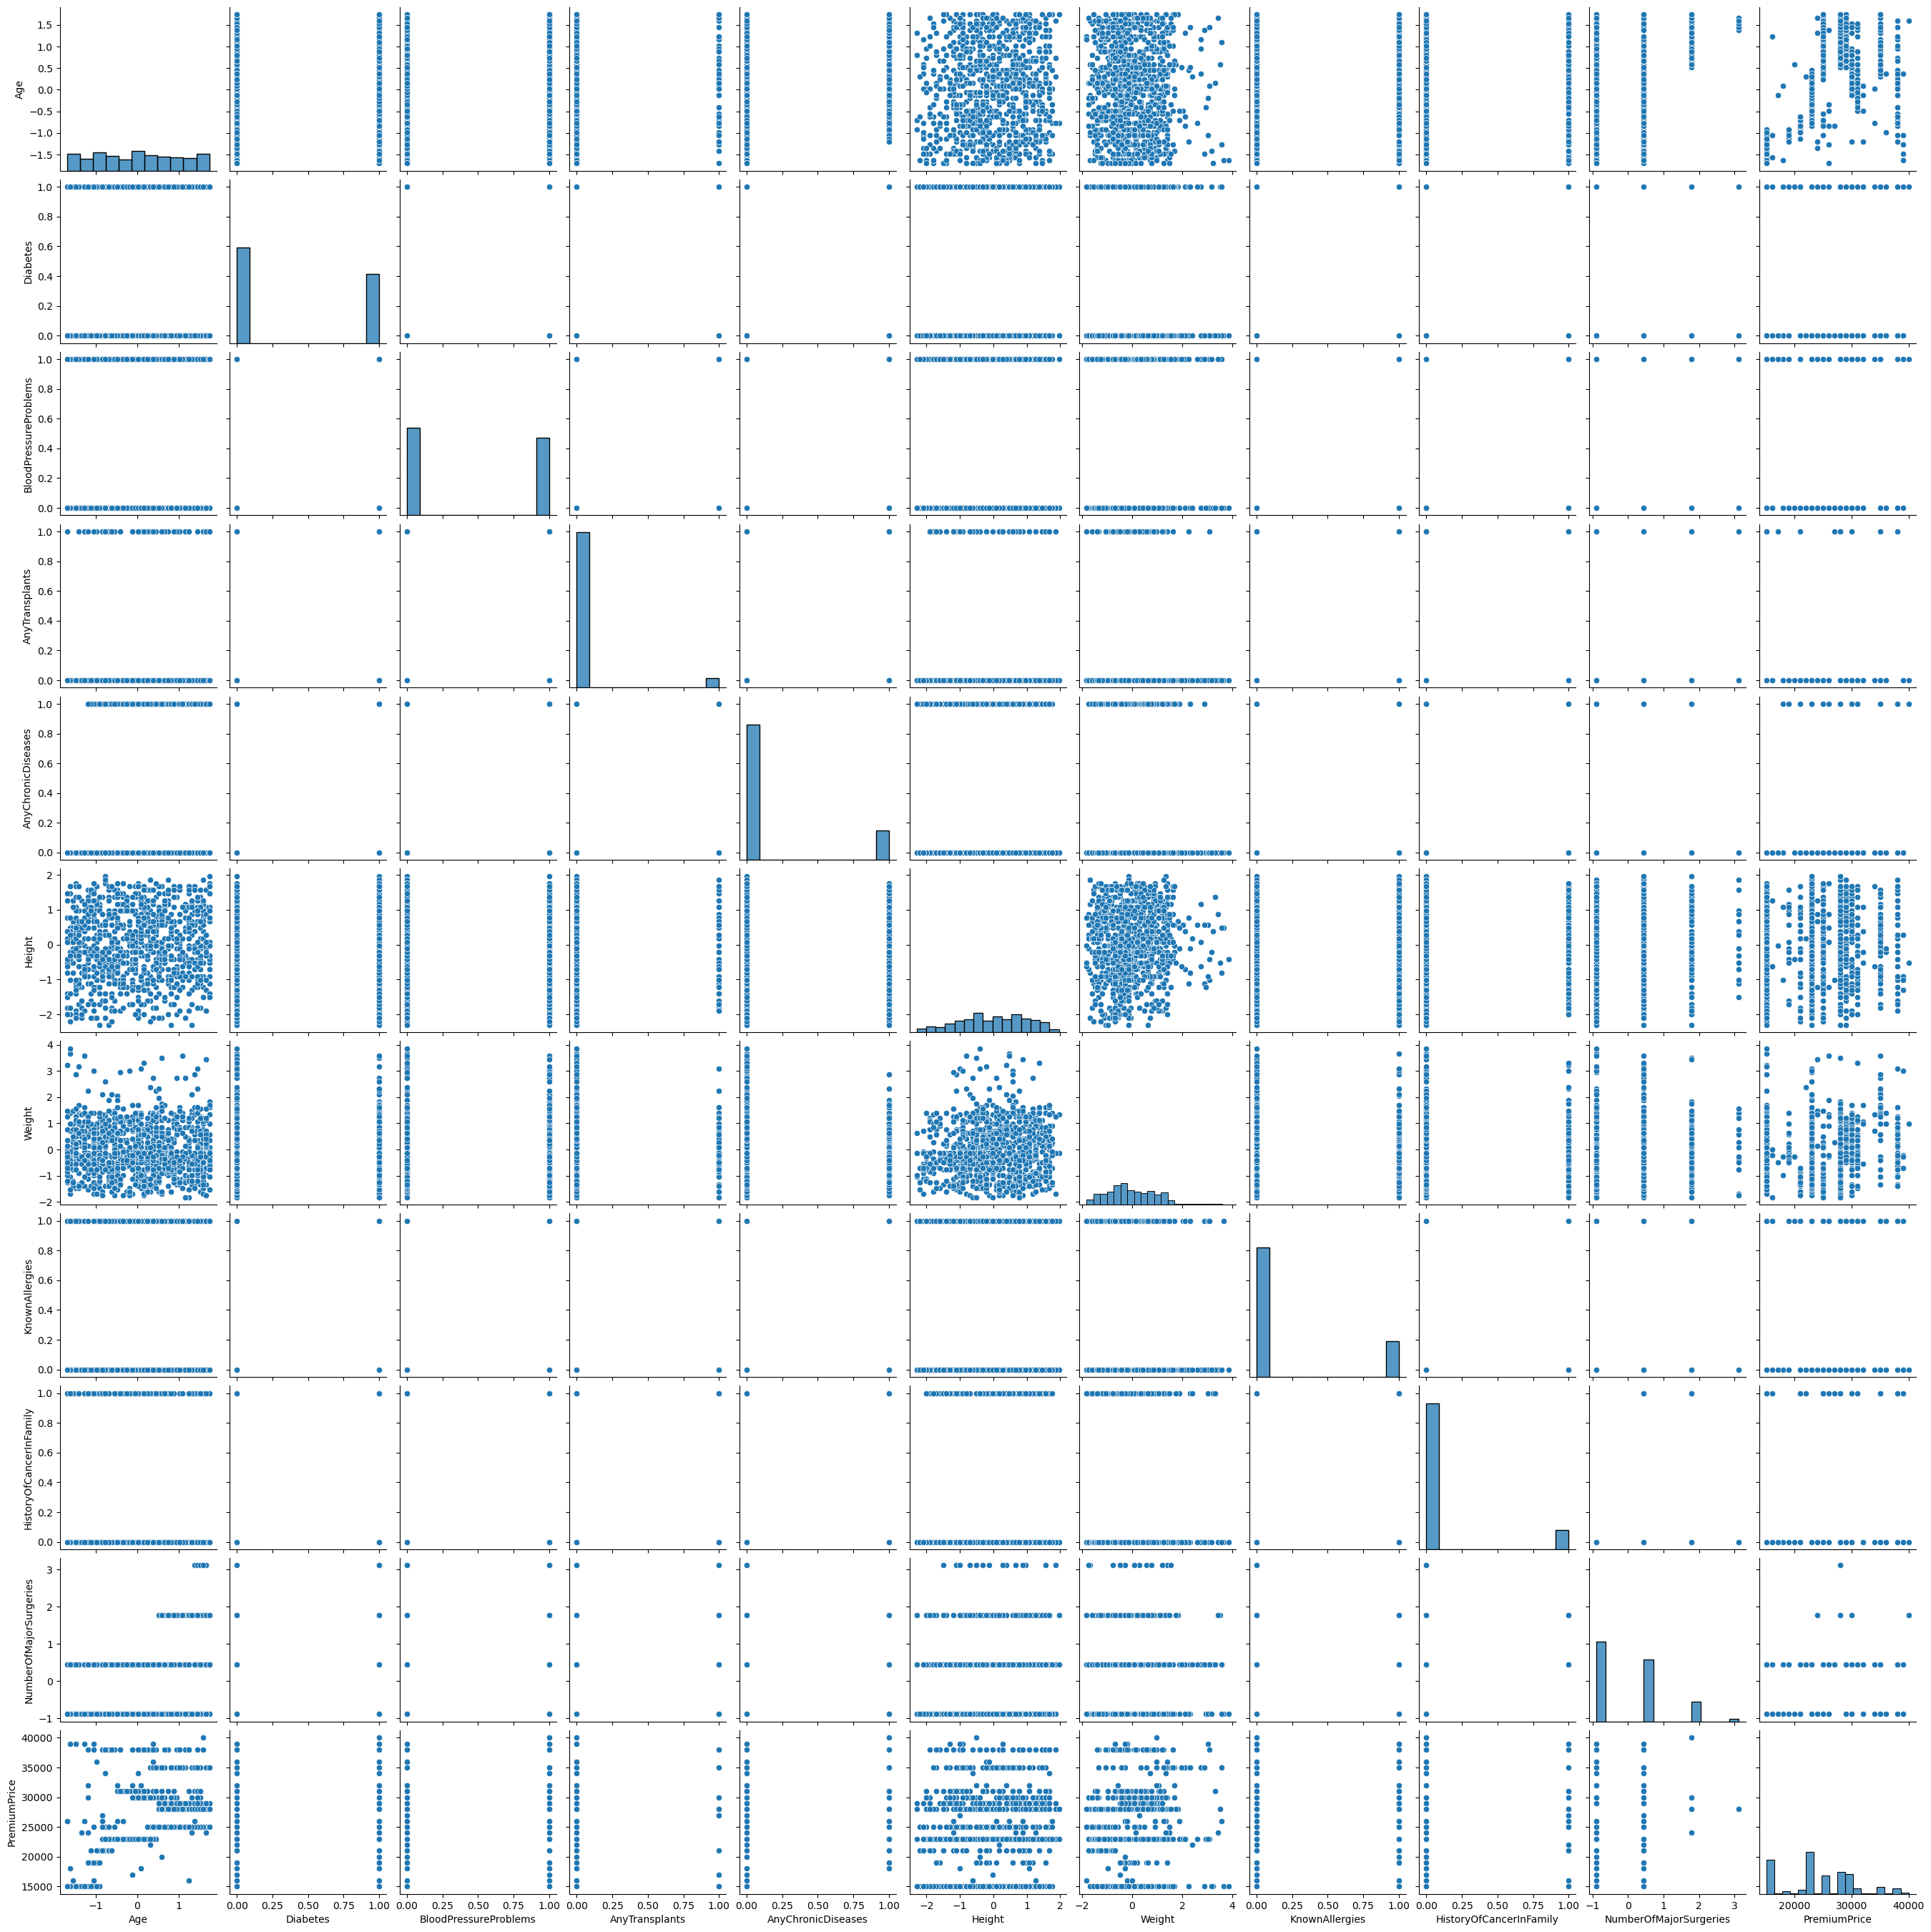


Summary Statistics:

                Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  9.860000e+02  986.000000             986.000000      986.000000   
mean   1.945705e-16    0.419878               0.468560        0.055781   
std    1.000507e+00    0.493789               0.499264        0.229615   
min   -1.701415e+00    0.000000               0.000000        0.000000   
25%   -8.415874e-01    0.000000               0.000000        0.000000   
50%    1.824009e-02    0.000000               0.000000        0.000000   
75%    8.064152e-01    1.000000               1.000000        0.000000   
max    1.737895e+00    1.000000               1.000000        1.000000   

       AnyChronicDiseases        Height        Weight  KnownAllergies  \
count          986.000000  9.860000e+02  9.860000e+02      986.000000   
mean             0.180527  4.900295e-16 -1.369200e-16        0.215010   
std              0.384821  1.000507e+00  1.000507e+00        0.411038   
min              0.

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot to Visualize Relationships Between Features
sns.pairplot(df)
plt.show()

# Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())

### Some observations
#### From the correlation heatmap, we can observe that the most valuable insights come from the last row, which shows the correlation between Premium Price and other features. The correlation between Age and Premium Price has the highest value, which is expected. The next most correlated feature is the Number of Major Surgeries, with a correlation of **0.43**. Based on these statistics, we can create a subset of features to train the models.

## 4. Model Selection

### (1). Linear Regression Model

In [17]:
X = df.drop('PremiumPrice', axis=1)  
y = df['PremiumPrice']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()

# I am going to use 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    linear_regression.fit(X_train_fold, y_train_fold)
    y_pred_fold = linear_regression.predict(X_test_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    r2_scores.append(r2)

average_r2 = np.mean(r2_scores)
print(f'Average Linear Regression R^2 score: {average_r2:.2f}')

Average Linear Regression R^2 score: 0.62


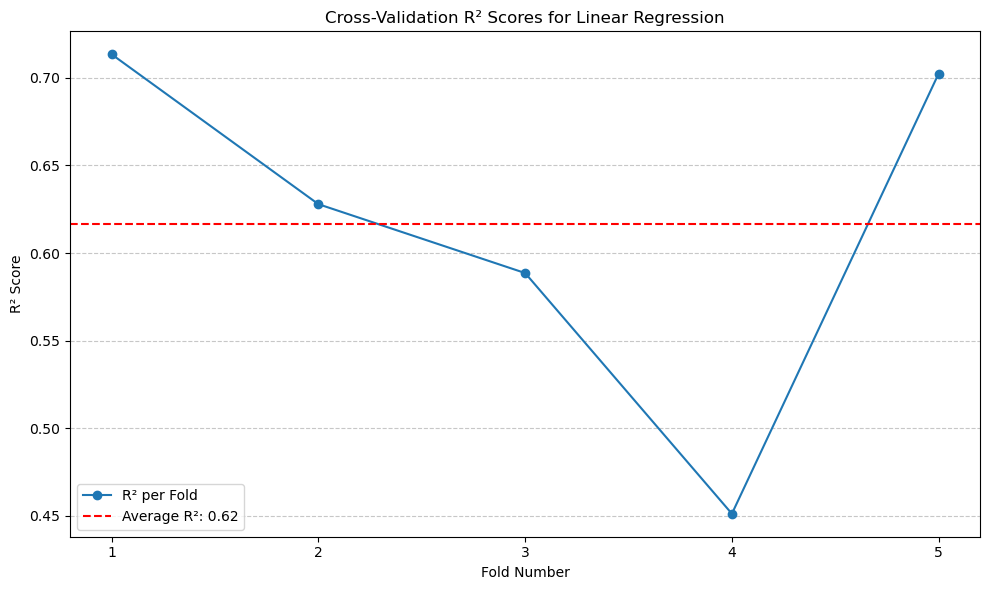

In [18]:
# Plotting R² scores for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=average_r2, color='red', linestyle='--', label=f'Average R²: {average_r2:.2f}')
plt.title('Cross-Validation R² Scores for Linear Regression')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(r2_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### From the result, we can see the average $R^2$ with 5-fold cross-validation is around **0.62**. 
---

### (2). Polynomial Regression Model

In [21]:
# Polynomial Regression (All Features)
max_degree = 5
best_degree = 1
best_r2 = float('-inf')
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    scores_poly = cross_val_score(linear_regression, X_poly, y, cv=kf, scoring='r2')
    avg_r2_poly = scores_poly.mean()
    print(f'Polynomial Degree {degree} Average R^2 score: {avg_r2_poly:.2f}')

    if avg_r2_poly > best_r2:
        best_r2 = avg_r2_poly
        best_degree = degree

print(f'Best polynomial degree (All Features): {best_degree} with R^2: {best_r2:.2f}')

Polynomial Degree 1 Average R^2 score: 0.62
Polynomial Degree 2 Average R^2 score: 0.67
Polynomial Degree 3 Average R^2 score: -117379802002969648.00
Polynomial Degree 4 Average R^2 score: -6790995910801204707328.00
Polynomial Degree 5 Average R^2 score: -63.55
Best polynomial degree (All Features): 2 with R^2: 0.67


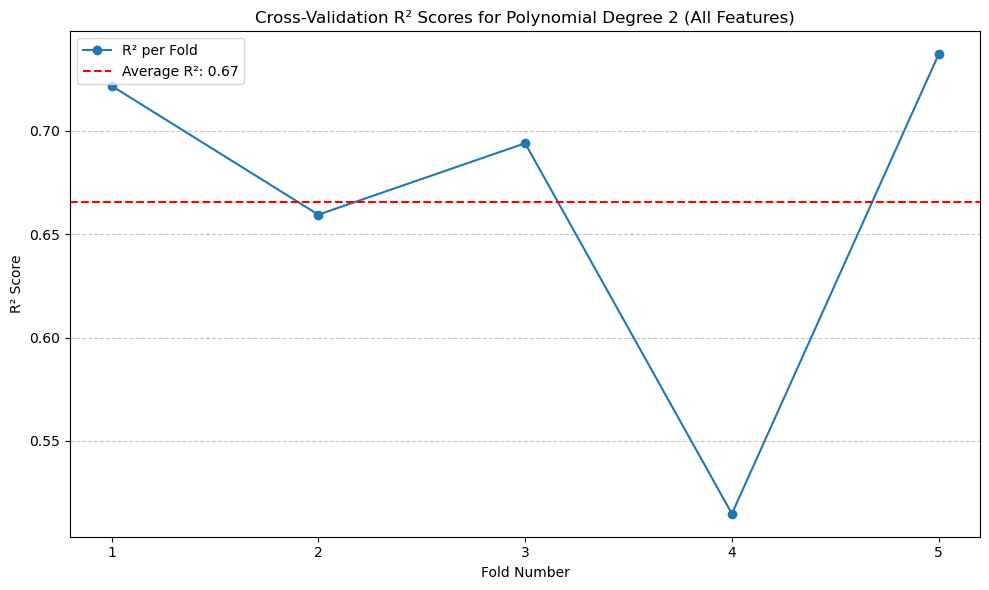

In [22]:
# Calculate R^2 scores for polynomial degree 2 across folds for all features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
r2_scores_poly_degree_2 = cross_val_score(linear_regression, X_poly, y, cv=kf, scoring='r2')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores_poly_degree_2) + 1), r2_scores_poly_degree_2, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=r2_scores_poly_degree_2.mean(), color='red', linestyle='--', label=f'Average R²: {r2_scores_poly_degree_2.mean():.2f}')
plt.title('Cross-Validation R² Scores for Polynomial Degree 2 (All Features)')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(r2_scores_poly_degree_2) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The highest $R^2$ with cross-validation is degree of 2 polynomial, with R^2 of **0.67**. Other degrees are really off.
---

### Feature Selection for the Next Two Models

In the following models, I have selected the features: 
- **Age**
- **Number of Major Surgeries**
- **Diabetes**
- **Blood Pressure Problems**

These features were chosen based on correlation analysis, as they showed a higher correlation with the target variable, **Premium Price**. By focusing on these features, the models might potentially achieve better predictive performance while reducing complexity.

### (3). Linear Regression with Selected Features


In [25]:
# Linear Regression with Selected Features
selected_features_1 = ['Age', 'NumberOfMajorSurgeries', 'Diabetes', 'BloodPressureProblems']
X_selected_1 = df[selected_features_1]
linear_regression_selected_1 = LinearRegression()
scores_selected_1 = cross_val_score(linear_regression_selected_1, X_selected_1, y, cv=kf, scoring='r2')
average_selected_1_r2 = scores_selected_1.mean()
print(f'Average R² (Selected Features Model 1): {average_selected_1_r2:.2f}')

Average R² (Selected Features Model 1): 0.49


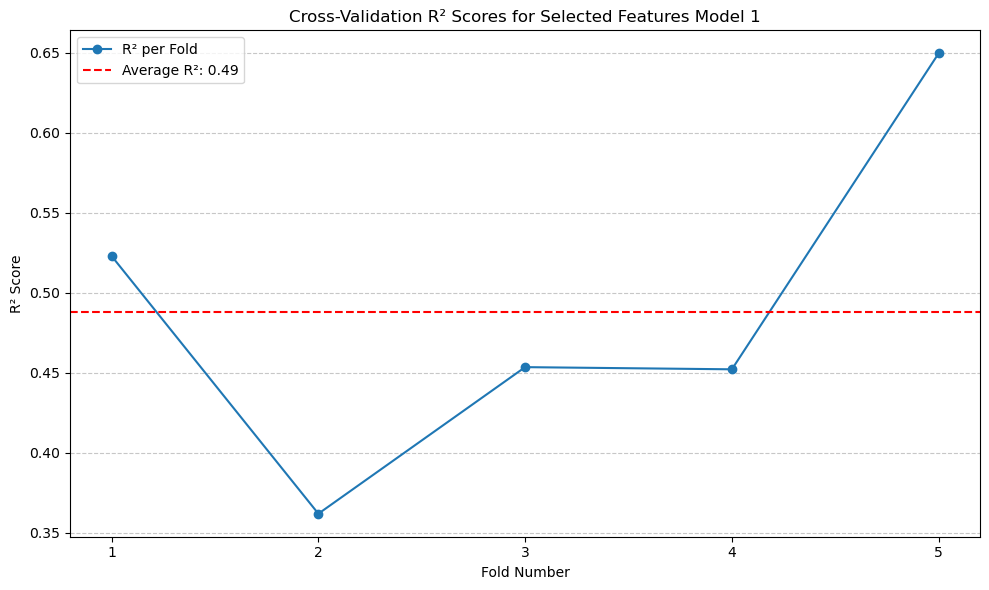

In [26]:
# Plotting R² scores for Selected Features Model 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores_selected_1) + 1), scores_selected_1, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=average_selected_1_r2, color='red', linestyle='--', label=f'Average R²: {average_selected_1_r2:.2f}')
plt.title('Cross-Validation R² Scores for Selected Features Model 1')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(scores_selected_1) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The $R^2$ score is **0.49**, which is lower than that of Linear Regression without the selected features. This indicates that the features I selected do not improve the performance of the Linear Regression model.
----

### (4). Polynomial Regression with Selected Features 

In [29]:
# Polynomial Regression (Selected Features)
selected_features = ['Age', 'NumberOfMajorSurgeries', 'Diabetes', 'BloodPressureProblems']
X_selected = df[selected_features]

best_selected_degree = 1
best_selected_r22 = float('-inf')
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_selected_poly = poly.fit_transform(X_selected)
    scores_selected_poly = cross_val_score(linear_regression, X_selected_poly, y, cv=kf, scoring='r2')
    avg_selected_r2 = scores_selected_poly.mean()
    print(f'Selected Features Polynomial Degree {degree} Average R^2 score: {avg_selected_r2:.2f}')

    if avg_selected_r2 > best_selected_r22:
        best_selected_r22 = avg_selected_r2
        best_selected_degree = degree

print(f'Best polynomial degree (Selected Features): {best_selected_degree} with R^2: {best_selected_r22:.2f}')

Selected Features Polynomial Degree 1 Average R^2 score: 0.49
Selected Features Polynomial Degree 2 Average R^2 score: 0.54
Selected Features Polynomial Degree 3 Average R^2 score: 0.54
Selected Features Polynomial Degree 4 Average R^2 score: 0.54
Selected Features Polynomial Degree 5 Average R^2 score: -62715009326282743808.00
Best polynomial degree (Selected Features): 2 with R^2: 0.54


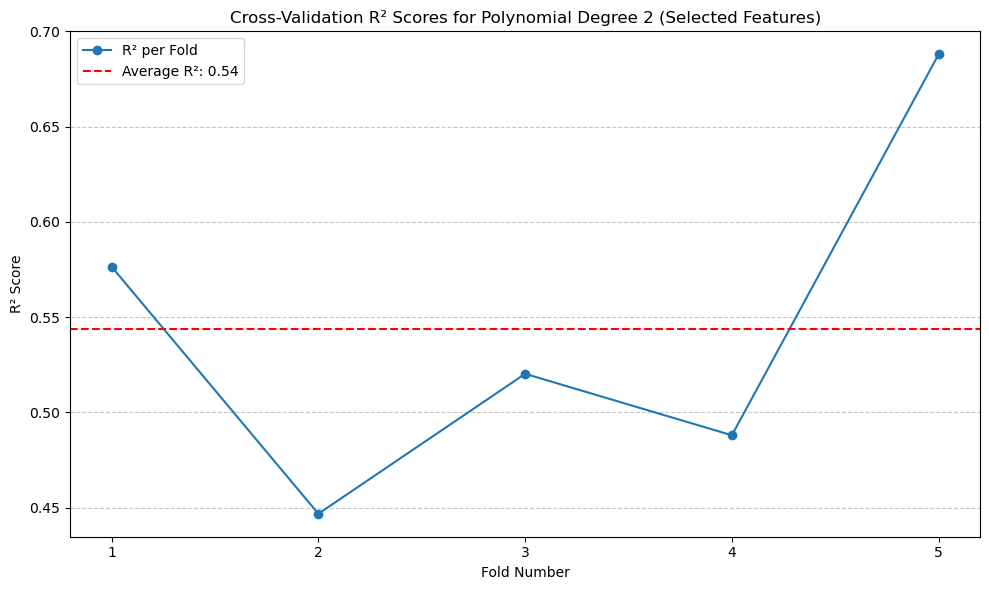

In [30]:
# Calculate R² scores for polynomial degree 2 across folds for selected features
poly = PolynomialFeatures(degree=2)
X_selected_poly = poly.fit_transform(X_selected)
r2_scores_degree_2_folds = cross_val_score(linear_regression, X_selected_poly, y, cv=kf, scoring='r2')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores_degree_2_folds) + 1), r2_scores_degree_2_folds, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=r2_scores_degree_2_folds.mean(), color='red', linestyle='--', label=f'Average R²: {r2_scores_degree_2_folds.mean():.2f}')
plt.title('Cross-Validation R² Scores for Polynomial Degree 2 (Selected Features)')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(r2_scores_degree_2_folds) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The result of the polynomial regression is similar and does not improve upon the original polynomial regression model.
---

### (5). Models with Regularization 

#### Since the models with selected features failed to provide better performance, I will try using Ridge regularization to identify which features contribute to improving predictions.

#### In addition to plotting the Ridge regularization, I also included an extra model: Ridge Regression. Although we did not cover it, I believe it will be useful for comparison.

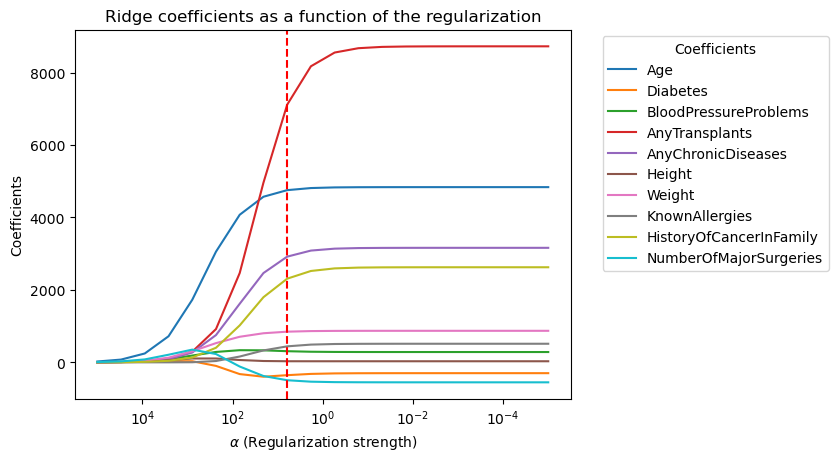

Coefficient at min_test_error_alpha: [4754.89254546 -354.53094652  307.46418499 7115.69140237 2918.85897387
   30.01393196  846.59435371  441.47104729 2310.15681503 -494.19120566]


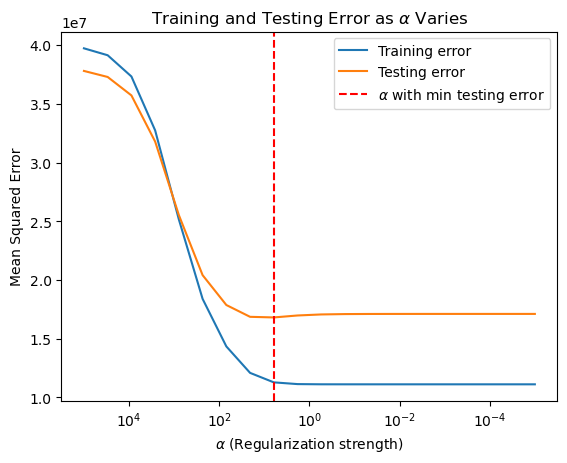

In [34]:
# Ridge Regularization Section
from sklearn.linear_model import Ridge

X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y, test_size=0.5, random_state=0)

alphas = np.logspace(5, -5, 20)

coefficients = np.zeros((len(alphas), X_train_ridge.shape[1]))

train_mse = []
test_mse = []

for index, alpha in enumerate(alphas):

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_ridge, y_train_ridge)

    y_train_pred = ridge.predict(X_train_ridge)
    y_test_pred = ridge.predict(X_test_ridge)

    train_mse.append(mean_squared_error(y_train_ridge, y_train_pred))
    test_mse.append(mean_squared_error(y_test_ridge, y_test_pred))
    
    coefficients[index, :] = ridge.coef_

min_test_error_alpha = alphas[np.argmin(test_mse)]

plt.figure()
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.axvline(min_test_error_alpha, color='red', linestyle='--')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlabel(r'$\alpha$ (Regularization strength)')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.legend(title="Coefficients", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

best_coef = coefficients[np.argmin(test_mse)]
print(f'Coefficient at min_test_error_alpha: {best_coef}')

plt.figure()
plt.plot(alphas, train_mse, label='Training error')
plt.plot(alphas, test_mse, label='Testing error')
plt.axvline(min_test_error_alpha, color='red', linestyle='--', label=r'$\alpha$ with min testing error')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlabel(r'$\alpha$ (Regularization strength)')
plt.ylabel('Mean Squared Error')
plt.title(r'Training and Testing Error as $\alpha$ Varies')
plt.legend()
plt.show()

In [35]:
# Ridge Regression
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y, test_size=0.5, random_state=0)
alphas = np.logspace(5, -5, 20)
train_mse = []
test_mse = []
coefficients = np.zeros((len(alphas), X_train_ridge.shape[1]))

for index, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_ridge, y_train_ridge)
    y_train_pred = ridge.predict(X_train_ridge)
    y_test_pred = ridge.predict(X_test_ridge)
    train_mse.append(mean_squared_error(y_train_ridge, y_train_pred))
    test_mse.append(mean_squared_error(y_test_ridge, y_test_pred))
    coefficients[index, :] = ridge.coef_

min_test_error_alpha = alphas[np.argmin(test_mse)]
ridge_cv_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    ridge = Ridge(alpha=min_test_error_alpha)
    ridge.fit(X_train_fold, y_train_fold)
    y_pred_fold = ridge.predict(X_test_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    ridge_cv_scores.append(r2)

ridge_average_r2 = np.mean(ridge_cv_scores)
print(f'Average Ridge Regression R^2: {ridge_average_r2:.2f}')

Average Ridge Regression R^2: 0.62


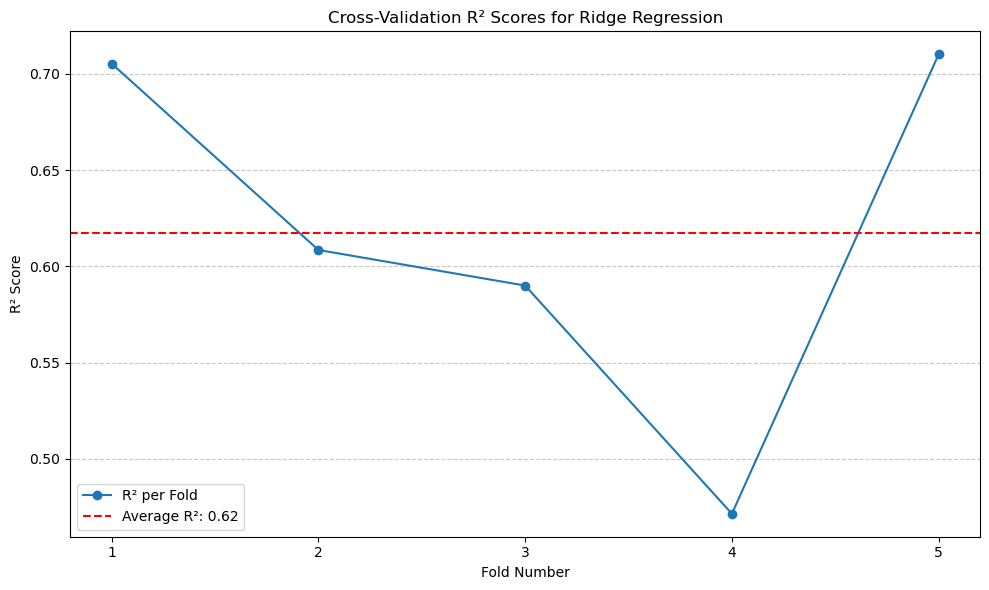

In [36]:
# Plotting R² scores for Ridge Regression with optimal alpha
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ridge_cv_scores) + 1), ridge_cv_scores, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=ridge_average_r2, color='red', linestyle='--', label=f'Average R²: {ridge_average_r2:.2f}')
plt.title('Cross-Validation R² Scores for Ridge Regression')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(ridge_cv_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The $R^2$ of Ridge Regression is **0.62**, which is same as the original Linear Regression model.  
---

### New selected features

 From the first plot above, we can identify the important features after applying regularization: 'Age,' 'AnyTransplants,' 'AnyChronicDiseases,' 'HistoryOfCancerInFamily,' 'Weight,' and 'Height.' I will use these features to train new models.

In the following models, I have selected the features: 
- **Age**
- **AnyTransplants**
- **AnyChronicDiseases**
- **HistoryOfCancerInFamily**
- **Weight**
- **Height**

These features were chosen based on regularization analysis. By focusing on these features, the models might potentially achieve better predictive performance while reducing complexity.

### (6). Linear Regression with features from regularization (better features).

In [40]:
selected_features_2 = ['Age', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'Weight', 'Height']
X_selected_2 = df[selected_features_2]

# Linear Regression with features from regularization.¶
linear_regression_selected_2 = LinearRegression()
scores_selected_2 = cross_val_score(linear_regression_selected_2, X_selected_2, y, cv=kf, scoring='r2')
average_selected_2_r2 = scores_selected_2.mean()
print(f'Average R² (Selected Features Model 2 - Better): {average_selected_2_r2:.2f}')

Average R² (Selected Features Model 2 - Better): 0.61


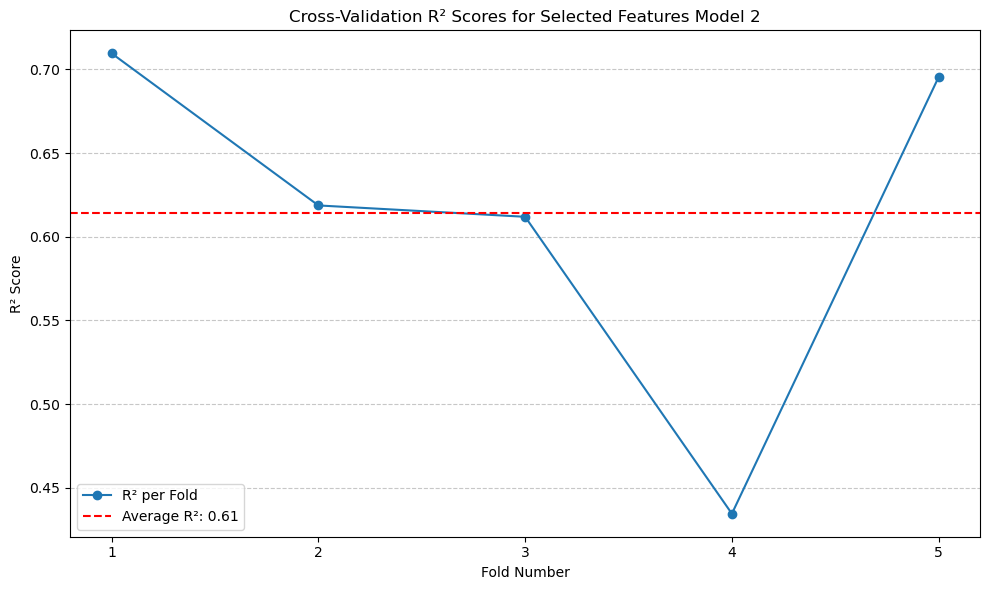

In [41]:
# Plotting R² scores for Selected Features Model 2
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores_selected_2) + 1), scores_selected_2, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=average_selected_2_r2, color='red', linestyle='--', label=f'Average R²: {average_selected_2_r2:.2f}')
plt.title('Cross-Validation R² Scores for Selected Features Model 2')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(scores_selected_2) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The $R^2$ did not improve significantly compared to the original model, but it is better than the model with the originally selected features.
---

### (7). Polynomial Regression with features from regularization (better features).

In [44]:
selected_features = ['Age', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'Weight', 'Height']
X_selected = df[selected_features]

scores_selected = cross_val_score(linear_regression, X_selected, y, cv=kf, scoring='r2')
print(f'Average R^2 score (Selected Features No Polynomial): {scores_selected.mean():.2f}')

# Polynomial for this new set of selected features
best_selected_degree = 1
best_selected_r2 = float('-inf')
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_selected_poly = poly.fit_transform(X_selected)
    scores_selected_poly = cross_val_score(linear_regression, X_selected_poly, y, cv=kf, scoring='r2')
    avg_selected_r2 = scores_selected_poly.mean()
    print(f'Another Selected Features Polynomial Degree {degree} Average R^2 score: {avg_selected_r2:.2f}')

    if avg_selected_r2 > best_selected_r2:
        best_selected_r2 = avg_selected_r2
        best_selected_degree = degree

print(f'Best polynomial degree (Another Selected Features): {best_selected_degree} with R^2: {best_selected_r2:.2f}')

Average R^2 score (Selected Features No Polynomial): 0.61
Another Selected Features Polynomial Degree 1 Average R^2 score: 0.61
Another Selected Features Polynomial Degree 2 Average R^2 score: 0.67
Another Selected Features Polynomial Degree 3 Average R^2 score: -7371758434716592128.00
Another Selected Features Polynomial Degree 4 Average R^2 score: -346382196271761536.00
Another Selected Features Polynomial Degree 5 Average R^2 score: -12089905827124340736.00
Best polynomial degree (Another Selected Features): 2 with R^2: 0.67


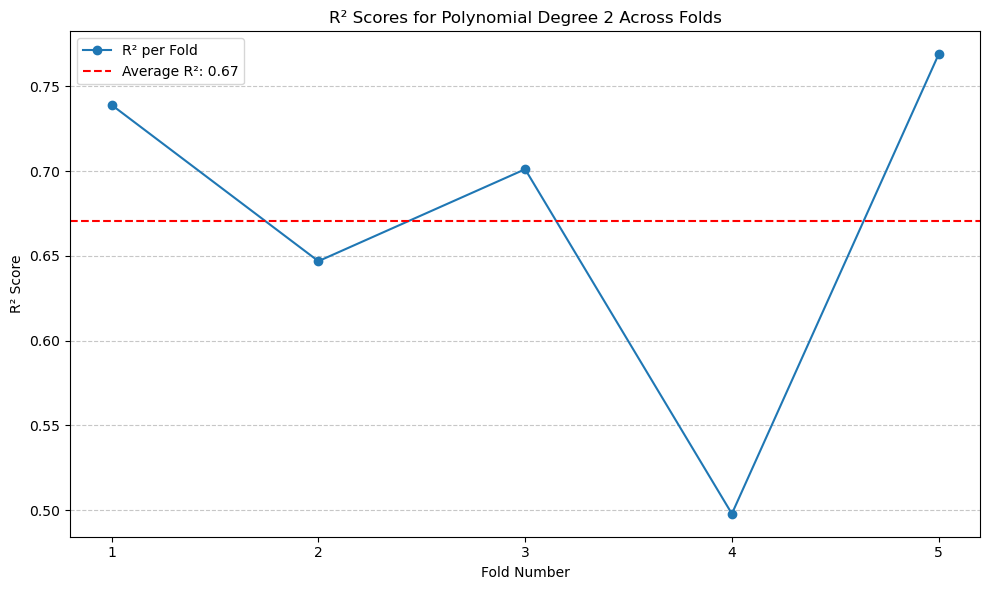

In [45]:
# Calculate R² scores for polynomial degree 2 across folds
poly = PolynomialFeatures(degree=2)
X_selected_poly = poly.fit_transform(X_selected)
r2_scores_degree_2_folds = cross_val_score(linear_regression, X_selected_poly, y, cv=kf, scoring='r2')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_scores_degree_2_folds) + 1), r2_scores_degree_2_folds, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=r2_scores_degree_2_folds.mean(), color='red', linestyle='--', label=f'Average R²: {r2_scores_degree_2_folds.mean():.2f}')
plt.title('R² Scores for Polynomial Degree 2 Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(r2_scores_degree_2_folds) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### So far this model gives the highest performance, which $R^2$ of **0.67**.
---

## 4.5 Extras

#### In this section, I will introduce a few additional models that were not covered in our class. These models all demonstrate good performance.

### (8). Random Forest Model

In [50]:
# Random Forest Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf_regressor, X, y, cv=kf, scoring='r2')
print(f'Average Random Forest R^2: {scores_rf.mean():.2f}')

Average Random Forest R^2: 0.79


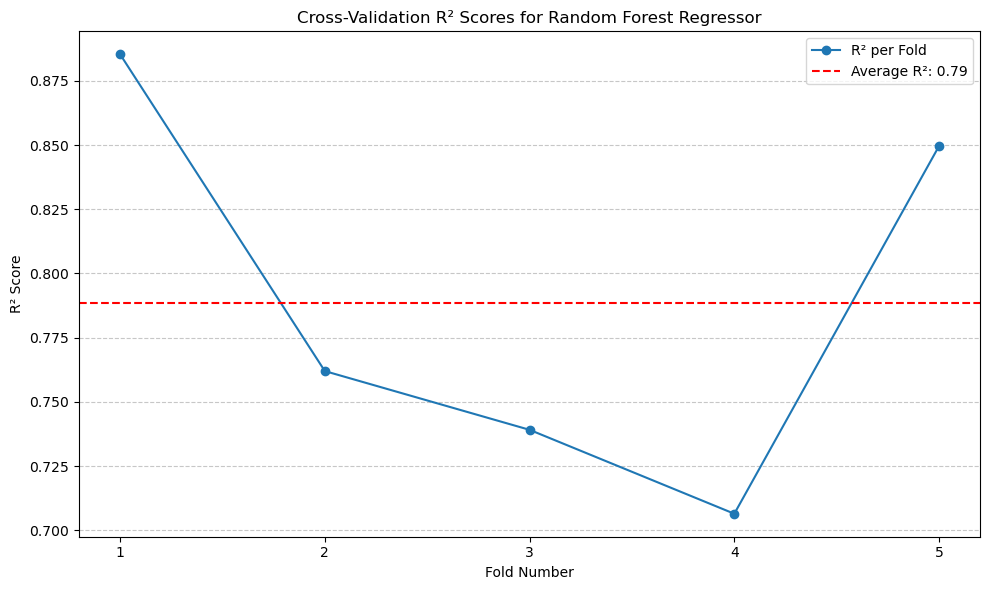

In [51]:
# Plotting R² scores for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores_rf) + 1), scores_rf, marker='o', linestyle='-', label='R² per Fold')
plt.axhline(y=scores_rf.mean(), color='red', linestyle='--', label=f'Average R²: {scores_rf.mean():.2f}')
plt.title('Cross-Validation R² Scores for Random Forest Regressor')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(scores_rf) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The $R^2$ of this model is **0.79**.
---

### (9). Gradient Boosting 

In [54]:
# Gradient Boosting¶
gbr = GradientBoostingRegressor(n_estimators=100, 
                                max_depth=3, 
                                learning_rate=0.1, 
                                random_state=42)
gbr_r2_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    gbr.fit(X_train_fold, y_train_fold)
    y_pred_fold = gbr.predict(X_test_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    gbr_r2_scores.append(r2)
average_gbr_r2 = np.mean(gbr_r2_scores)
print(f'Average Gradient Boosting R^2: {average_gbr_r2:.2f}')

Average Gradient Boosting R^2: 0.77


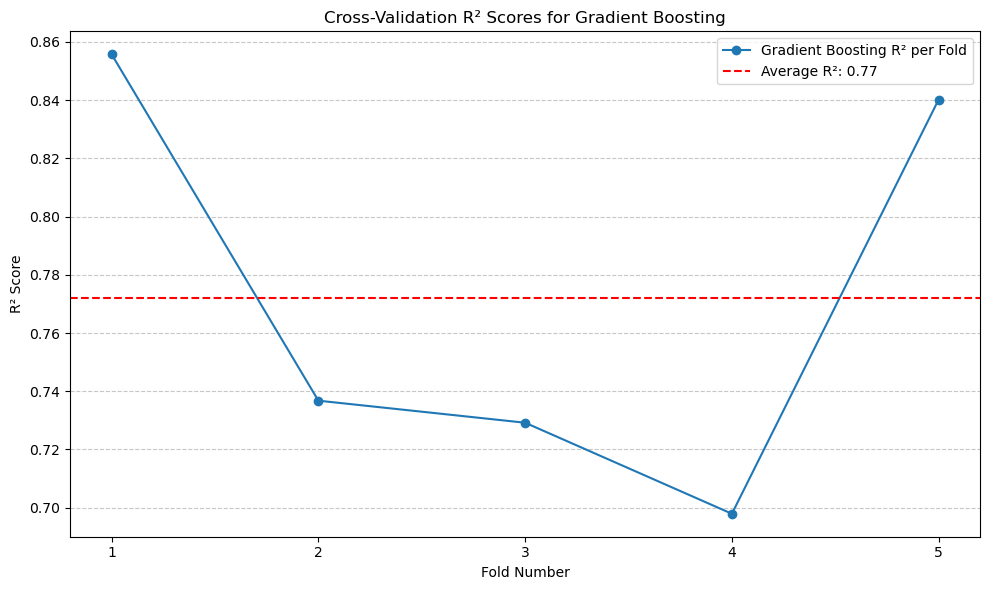

In [55]:
# Plotting Gradient Boosting R² scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gbr_r2_scores) + 1), gbr_r2_scores, marker='o', linestyle='-', label='Gradient Boosting R² per Fold')
plt.axhline(y=average_gbr_r2, color='red', linestyle='--', label=f'Average R²: {average_gbr_r2:.2f}')
plt.title('Cross-Validation R² Scores for Gradient Boosting')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(gbr_r2_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Although Gradient Boosting did not achieve a higher $R^2$ than Random Forest, it still outperforms the standard regression models.
---

### (10). Hist Gradient Boosting

In [58]:
# Hist Gradient Boosting
hgb = HistGradientBoostingRegressor(max_iter=100, 
                                    learning_rate=0.1, 
                                    max_leaf_nodes=31, 
                                    random_state=42)
hgb_r2_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    hgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = hgb.predict(X_test_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    hgb_r2_scores.append(r2)
average_hgb_r2 = np.mean(hgb_r2_scores)
print(f'Average HistGradientBoosting R^2: {average_hgb_r2:.2f}')

Average HistGradientBoosting R^2: 0.78


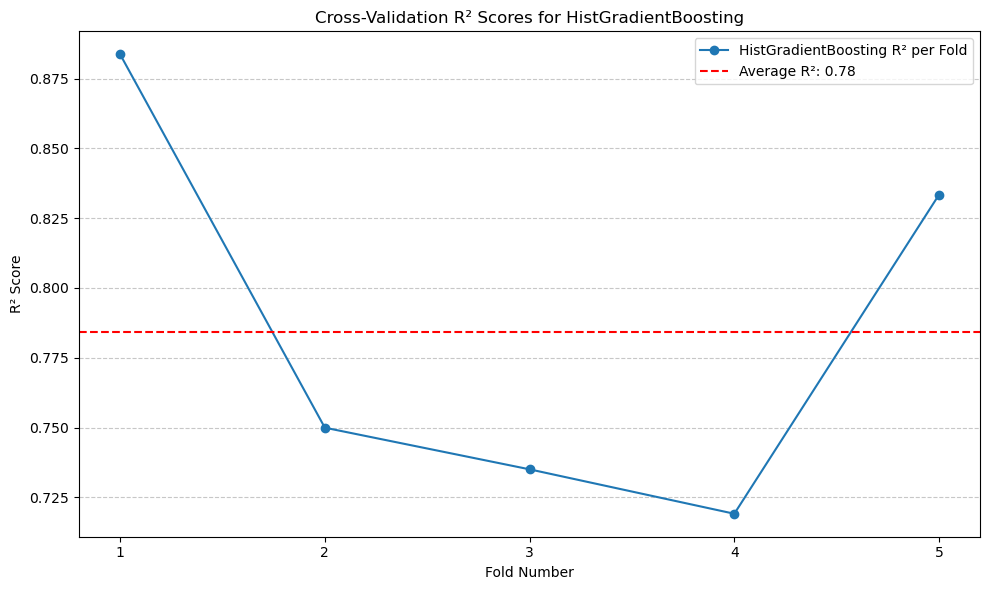

In [59]:
# Plotting HistGradientBoosting R² scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(hgb_r2_scores) + 1), hgb_r2_scores, marker='o', linestyle='-', label='HistGradientBoosting R² per Fold')
plt.axhline(y=average_hgb_r2, color='red', linestyle='--', label=f'Average R²: {average_hgb_r2:.2f}')
plt.title('Cross-Validation R² Scores for HistGradientBoosting')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(hgb_r2_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The $R^2$ is higher than Gradient Boosting.
---

### (11). Stacking Regressor

In [62]:
# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', rf_regressor),
        ('hist_gradient_boosting', hgb)
    ],
    final_estimator=LinearRegression()
)
stacking_r2_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    stacking_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = stacking_model.predict(X_test_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    stacking_r2_scores.append(r2)

average_stacking_r2 = np.mean(stacking_r2_scores)
print(f'Average Stacking Regressor R^2: {average_stacking_r2:.2f}')

Average Stacking Regressor R^2: 0.80


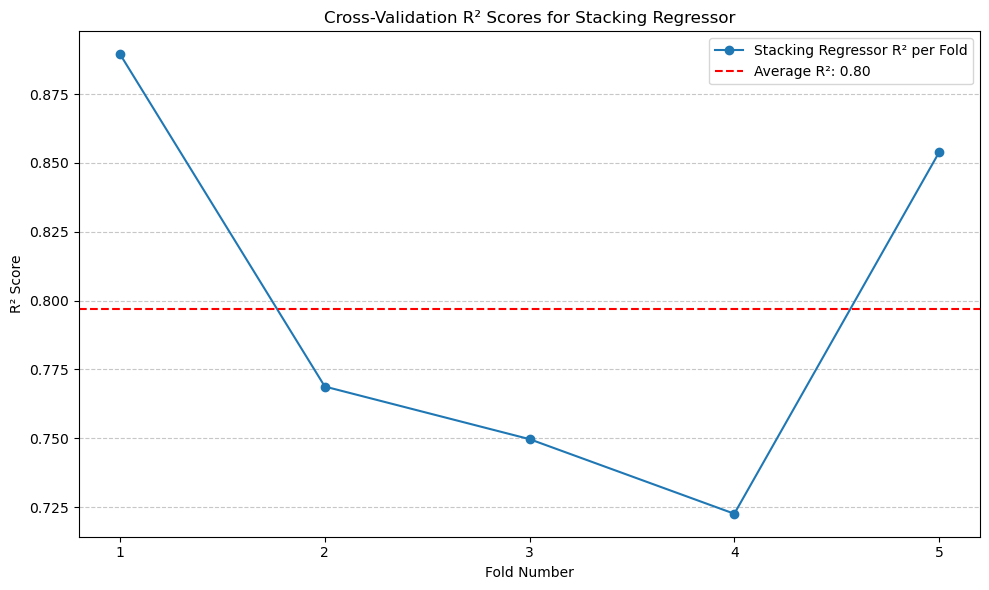

In [63]:
# Plotting Stacking Regressor R² scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(stacking_r2_scores) + 1), stacking_r2_scores, marker='o', linestyle='-', label='Stacking Regressor R² per Fold')
plt.axhline(y=average_stacking_r2, color='red', linestyle='--', label=f'Average R²: {average_stacking_r2:.2f}')
plt.title('Cross-Validation R² Scores for Stacking Regressor')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.xticks(range(1, len(stacking_r2_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Stacking Regressor gives the best performance, with $R^2$ of **0.8**.
---

## 5. Analysis 

### Performance Comparing

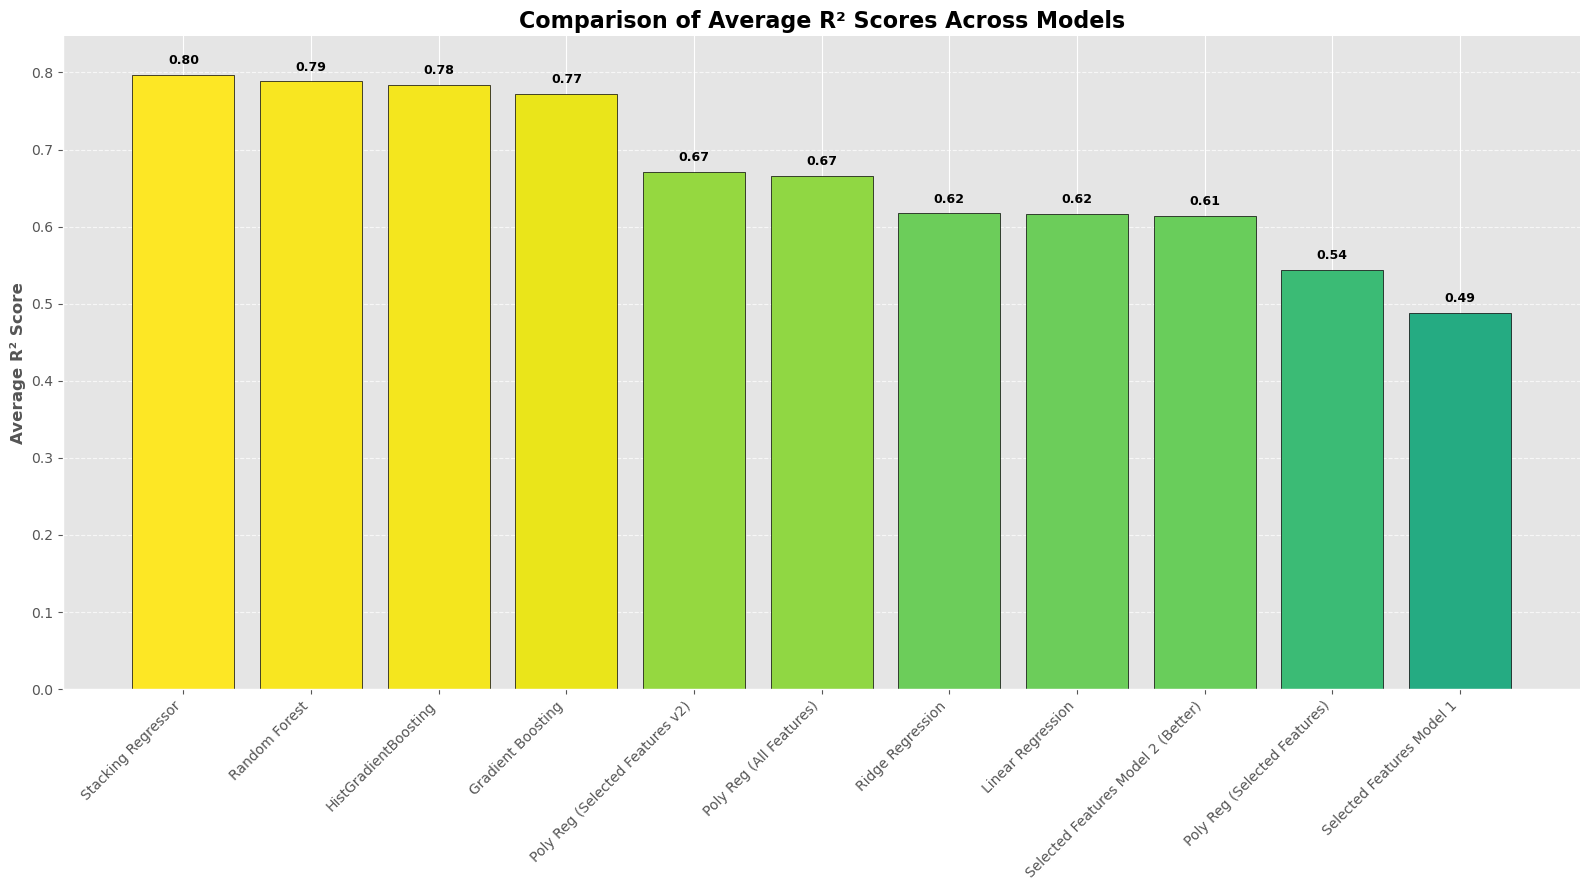

In [67]:
# ChatGPT contributed a lot to this section.
model_scores = {
    'Linear Regression': average_r2,
    'Poly Reg (All Features)': best_r2,
    'Poly Reg (Selected Features)': best_selected_r22,  # Existing model
    'Ridge Regression': ridge_average_r2,
    'Random Forest': scores_rf.mean(),
    'Gradient Boosting': average_gbr_r2,
    'HistGradientBoosting': average_hgb_r2,
    'Stacking Regressor': average_stacking_r2,
    'Selected Features Model 1': average_selected_1_r2,
    'Selected Features Model 2 (Better)': average_selected_2_r2
}

# -----------------------------------
# Step 1: Add the New Polynomial Regression (Selected Features) Model
# -----------------------------------

# Define a unique name for the new model to avoid confusion
new_model_name = 'Poly Reg (Selected Features v2)'

# Assign the new R² score to the new model name
model_scores[new_model_name] = best_selected_r2

# -----------------------------------
# Step 2: Plot All 11 Models
# -----------------------------------

# Sort models by R² in descending order
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)
models, r2_values = zip(*sorted_models)

# Determine y-axis limits with a margin
y_min = min(r2_values) - 0.05 if min(r2_values) < 0 else 0
y_max = max(r2_values) + 0.05

# Apply a clean Matplotlib style
plt.style.use('ggplot')  # Alternatives: 'fivethirtyeight', 'classic', etc.

plt.figure(figsize=(16, 9))  # Increased size for better readability with more models

# Create a color palette based on R² values
normalized_r2 = [val / max(r2_values) for val in r2_values]
bars = plt.bar(models, r2_values, color=plt.cm.viridis(normalized_r2), edgecolor='black')

# Annotate bars with R² values
for bar, score in zip(bars, r2_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        score + 0.01,  # Slightly above the bar
        f'{score:.2f}', 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        fontweight='bold',
        color='black'
    )

# Customize axes and title
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel('Average R² Score', fontsize=12, fontweight='bold')
plt.title('Comparison of Average R² Scores Across Models', fontsize=16, fontweight='bold')
plt.ylim(y_min, y_max)

# Remove unnecessary spines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add subtle gridlines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()


### From the histogram plot, we can observe a clearer representation of prediction performance. The additional models show similar results, while the other models perform adequately. Among all the models discussed in our lecture, polynomial regression models of degree 2 provide the best predictions, both with and without the selected features.

### Comparing Regular and Advanced Models

Both regular and advanced models perform well, but there's a noticeable gap between them. Let's explore why advanced models often have the edge.

---

### Ensemble Methods: The Power Behind Advanced Models

Advanced models often use **Ensemble Methods**, which combine multiple models to capture complex patterns in data. Unlike simpler models, they don't assume linear relationships and can handle intricate, non-linear interactions directly from the data.

---

### Random Forest

A **Random Forest** combines many decision trees to improve accuracy and reliability.

**How It Works:**
- **Multiple Trees:** Imagine a group of friends each making their own prediction (e.g., weather forecasts) using different information.
- **Averaging Predictions:** By averaging all their guesses, the overall prediction becomes more accurate than any single friend's guess.
- **Benefit:** Reduces errors by averaging out the variance from individual trees.

**Result:** A robust model that generalizes well by leveraging the diversity of multiple trees.

---

### Gradient Boosting

**Gradient Boosting** builds models step-by-step, each one correcting the errors of the previous ones.

**How It Works:**
1. **Start Simple:** Begin with a basic model.
2. **Identify Errors:** Find where this model is wrong.
3. **Add Correctors:** Introduce new models that fix these mistakes.
4. **Iterate:** Repeat the process to continuously improve accuracy.

**HistGradientBoosting:** A faster variant that uses histograms to speed up training without sacrificing performance.

**Result:** Highly accurate models that refine themselves iteratively to capture complex data patterns.

---

### Stacking

**Stacking** combines different models to leverage their unique strengths.

**How It Works:**
- **Base Models:** Train multiple models (e.g., Random Forest, Gradient Boosting).
- **Meta-Model:** Use another model to learn how to best combine the predictions from the base models.
  
**Benefit:** Often achieves better performance by integrating diverse perspectives from different models.

**Result:** A unified model that outperforms any single base model by smartly combining their predictions.

---

### Summary

- **Random Forest:** Aggregates multiple decision trees to enhance accuracy and reduce overfitting.
- **Gradient Boosting:** Builds models sequentially, each improving on the last to achieve high precision.
- **Stacking:** Combines various models to capitalize on their individual strengths for superior performance.

These ensemble techniques are powerful because they merge the capabilities of several models, making them more effective for complex tasks.



## 6. Conclusion 


### This project focused on a few key steps:
- **Data Preparation**: Standardized and scaled the data to ensure it was ready for modeling.
- **Visualization**: Created plots to understand data distributions and feature relationships, often using ChatGPT's help for refining them.
- **Modeling**: Compared normal regression methods to more advanced techniques, while incorporating k-fold cross-validation to validate the results.

### Key Takeaways:
- **Model Performance**: R² was the main metric used, showing how well the models explained the target variable.
- **Advanced Techniques**: Extra regression methods provided better insights into the data’s complexity compared to standard approaches.
- **Collaborative Tools**: ChatGPT was a helpful resource, especially for plotting and integrating k-fold cross-validation into the workflow.

### Future Improvements:
- Fine-tune model settings to improve results further.
- Explore adding new features or data to make the predictions even more reliable.

### Some final thoughts:

- **1**. I mostly used $R^2$ because it’s straightforward and does a good job of showing how well the model explains the variance in the target variable. It felt like the right choice given the type of analysis I was doing.

- **2**. I didn’t bother with Lasso regression since Ridge already gave me what I needed. Ridge retains all the features, which was helpful for understanding how each one contributed without completely dropping any of them.

- **3**. I gave machine learning models a try, but the results weren’t much better than the simpler regression models. Considering the extra complexity they add, I decided it wasn’t worth including them here.

- **4**. I didn’t include any classification models because this project was focused on predicting a continuous value (premium price). Classification just didn’t fit with the goals I had in mind.

That said, there’s definitely room to explore more approaches in the future, especially with a larger or more complex dataset.



## 7. References

This project wouldn't have been possible without the guidance, inspiration, and resources provided by the following:

- **Course Notes**: [Introduction to Mathematical Concepts](https://rayzhangzirui.github.io/math10sp24/notes/notes_intro.html)  
  These notes laid the foundation for understanding the mathematical principles applied in this project.

- **Dataset**: [Medical Insurance Premium Prediction Dataset](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction) (Kaggle)  
  I am grateful for the open data shared by the community, which made this analysis possible.

- **ChatGPT**: Assisted in brainstorming ideas, refining code, debugging issues, and improving clarity in explanations and visualizations.

- **Wikipedia**: Regression models, machine learning algorithms, and cross-validation techniques.

- **Documentation**: [Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/) , [Matplotlib: Visualization Library](https://matplotlib.org/) , [Seaborn: Statistical Data Visualization](https://seaborn.pydata.org/) and more.

- **My Instructors and Peers**: Their guidance and encouragement throughout the learning process were invaluable.

This project reflects not just my efforts but also the collective knowledge and support of a broader community. I recognize that there is always more to learn and am deeply thankful for these resources that have made my work possible.
